Evaluating the similarity indexes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from scipy.spatial import distance
# Load the dataset
df = pd.read_excel("PAS1.xlsx", sheet_name='RAW')

In [2]:
df1=df[df["TimeSeries"]==0] #change to change the time
df2=df1.drop(df1.columns[[1, 2,3]], axis=1) # delate the unuseful columns
df2.set_index(df2.columns[0], inplace=True) # set the first row as index
df3=df2.transpose()
dat=df3.to_numpy()

##Do the same for the Time Series 8

fdf1=df[df["TimeSeries"]==8] #change to change the time
fdf2=fdf1.drop(fdf1.columns[[1, 2,3]], axis=1) # delete the unuseful columns
fdf2.set_index(fdf2.columns[0], inplace=True) # set the first row as index
fdf3=fdf2.transpose()
fdat=fdf3.to_numpy()

In [3]:
#test BrayCurtis 
test1=dat[:,0]
test2=fdat[:,0]

BCtest= distance.braycurtis(test1,test2)

In [4]:
# Evaluate the distances for the two comparable datasets 
BCtot = []

for i in range(dat.shape[1]):
    df0 = dat[:, i]  # column i-esima di dat
    df8 = fdat[:, i]  # column i-esima di fdat

    # Distance
    BC = distance.braycurtis(df0, df8)
    BCtot.append((i, BC))  # Save the index and the distance 


In [5]:
# Process Time Series 0
df1 = df[df["TimeSeries"] == 0]
df2 = df1.set_index(df1.columns[0])  # Set the first column as index (e.g., ID)
dat = df2.iloc[:, 3:].transpose().to_numpy()  # Select only numeric data for calculation

# Extract metadata for Time Series 0
metadata = df2.iloc[:, :3]  # First 3 columns are metadata (e.g., DietType, Gender)

# Process Time Series 8
fdf1 = df[df["TimeSeries"] == 8]
fdf2 = fdf1.set_index(fdf1.columns[0])  # Set the first column as index (e.g., ID)
fdat = fdf2.iloc[:, 3:].transpose().to_numpy()  # Select only numeric data for calculation

# Evaluate distances
BCtot = []
for i in range(dat.shape[1]):
    df0 = dat[:, i]  # Column i of dat
    df8 = fdat[:, i]  # Column i of fdat

    # Bray-Curtis distance
    BC = distance.braycurtis(df0, df8)

    # Retrieve corresponding metadata
    diet_type = metadata.iloc[i, 0]  
    gender = metadata.iloc[i, 2]    
    
    # Append index, distance, and metadata to the list
    BCtot.append((i, BC, diet_type, gender))

# Convert to a DataFrame for better handling
BCtot_df = pd.DataFrame(BCtot, columns=["Index", "BrayCurtisDistance", "DietType", "Gender"])


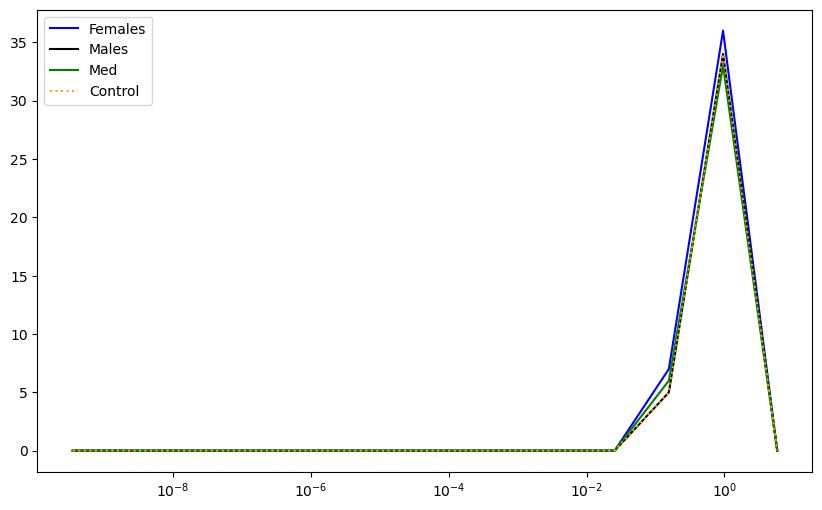

In [6]:
# Separate data by Gender and DietType
females = BCtot_df[(BCtot_df["Gender"] == "Female")]
males = BCtot_df[(BCtot_df["Gender"] == "Male")]
Med = BCtot_df[ (BCtot_df["DietType"] == "MED")]
Control = BCtot_df[(BCtot_df["DietType"] == "CONTROL")]
# Define bins for histogram
bins = np.logspace(-10, 1, 15)  # 50 bins from 1e-10 to 1

# Calculate histograms
hist_females, bins_females = np.histogram(females["BrayCurtisDistance"], bins=bins)
bins_mid_females = (bins_females[1:] + bins_females[:-1]) / 2

hist_males, bins_males = np.histogram(males["BrayCurtisDistance"], bins=bins)
bins_mid_males = (bins_males[1:] + bins_males[:-1]) / 2

hist_Control,bins_control=np.histogram(Control["BrayCurtisDistance"], bins=bins)
bins_mid_Control=(bins_control[1:]+bins_control[:-1])/2

hist_Med,bins_med=np.histogram(Med["BrayCurtisDistance"], bins=bins)
bins_mid_Med=(bins_med[1:]+bins_med[:-1])/2
# Plot the data
plt.figure(figsize=(10, 6))

plt.plot(bins_mid_females, hist_females, label="Females", color='blue')
plt.plot(bins_mid_males, hist_males, label="Males",color='black')
plt.plot(bins_mid_Med, hist_Control, label="Med", color='green')
plt.plot(bins_mid_Med, hist_males, label="Control", color='orange', linestyle='dotted')
plt.xscale('log')
plt.legend()